In [34]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist

In [19]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [14]:
# x_train[0]

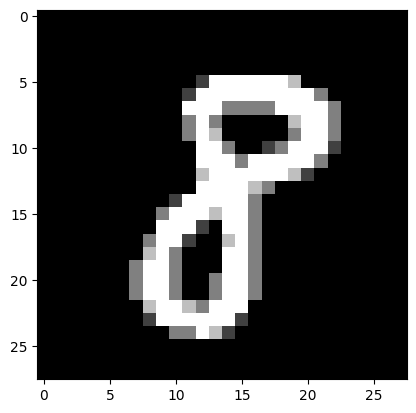

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[245], cmap='gray')
plt.show()

In [22]:
y_train[245]

8

In [23]:
# feature scaling
x_train = x_train/255
x_test = x_test/255

In [24]:
#Split dataset 
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [29]:
# Building CNN 
from tensorflow import keras
Cnn_model = keras.models.Sequential([
        keras.layers.Conv2D(filters=32,kernel_size=3,padding ='valid',activation = 'relu',input_shape = [28,28,1]),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation = 'relu'),
        keras.layers.Dense(units=10,activation= 'softmax')
]) 

In [30]:
Cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               692352    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [31]:
Cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
Cnn_model.fit(x_train,y_train, epochs =10, batch_size=512, verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
94/94 [==============================] - 16s 155ms/step - loss: 0.4558 - accuracy: 0.8783 - val_loss: 0.2154 - val_accuracy: 0.9382
Epoch 2/10
94/94 [==============================] - 15s 159ms/step - loss: 0.1533 - accuracy: 0.9554 - val_loss: 0.1304 - val_accuracy: 0.9632
Epoch 3/10
94/94 [==============================] - 17s 179ms/step - loss: 0.0944 - accuracy: 0.9735 - val_loss: 0.0948 - val_accuracy: 0.9731
Epoch 4/10
94/94 [==============================] - 13s 139ms/step - loss: 0.0686 - accuracy: 0.9805 - val_loss: 0.0790 - val_accuracy: 0.9787
Epoch 5/10
94/94 [==============================] - 16s 172ms/step - loss: 0.0540 - accuracy: 0.9846 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 6/10
94/94 [==============================] - 12s 133ms/step - loss: 0.0446 - accuracy: 0.9877 - val_loss: 0.0685 - val_accuracy: 0.9805
Epoch 7/10
94/94 [==============================] - 13s 141ms/step - loss: 0.0385 - accuracy: 0.9894 - val_loss: 0.0650 - val_accuracy: 0.9803

In [40]:
y_pred = Cnn_model.predict(np.expand_dims(x_test[0],axis=0)).round(1)
print("Predicted : " , np.argmax(y_pred))
print("Actual : ",y_test[0])

1/1 [==============================] - 0s 25ms/step
Predicted :  7
Actual :  7


In [32]:
#Test and evaluate
y_pred = Cnn_model.predict(x_test)
Cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0533 - accuracy: 0.9820


[0.053256548941135406, 0.9819999933242798]